In [1]:
#importing libraries
import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
#loading dataset
dataset = pd.read_csv('Crimes_2001_to_2022.csv',low_memory=False)
 
dataset.head(10)

# 

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,9/5/2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015,2/10/2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,9/4/2015 18:00,021XX W CHURCHILL ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,5,1161628.0,1912157.0,2015,2/10/2018 15:50,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,9/5/2015 13:00,025XX W CERMAK RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,25.0,31.0,6,1159734.0,1889313.0,2015,9/17/2015 11:37,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,9/5/2015 11:30,031XX W WASHINGTON BLVD,320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,...,27.0,27.0,3,1155536.0,1900515.0,2015,2/10/2018 15:50,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,5/1/2016 0:25,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,4/6/2019 16:04,NaN,NaN,NaN


In [3]:
dataset.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
# droping the features that are not usefull
dataset=dataset.drop(columns=['IUCR','Case Number','Description','FBI Code','Updated On','Block'])
# X.shape

print('Columns in dataset: ', dataset.columns)


dataset


Columns in dataset:  Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,9/5/2015 13:30,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,9/4/2015 11:30,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,9/1/2018 0:01,THEFT,RESIDENCE,False,True,631,6.0,8.0,44.0,NaN,NaN,2018,NaN,NaN,NaN
3,10224740,9/5/2015 12:45,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,9/5/2015 13:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1317475,1/4/2001 22:30,MOTOR VEHICLE THEFT,STREET,False,False,621,6.0,NaN,NaN,1174377.0,1852400.0,2001,41.750382,-87.636574,"(41.75038194, -87.636573873)"
1048571,1317476,1/1/2001 6:42,BATTERY,CHA PARKING LOT/GROUNDS,False,False,925,9.0,NaN,NaN,1175232.0,1879394.0,2001,41.824437,-87.632635,"(41.824437264, -87.632634617)"
1048572,1317477,1/3/2001 19:41,BATTERY,RESIDENCE,False,True,1423,14.0,NaN,NaN,1158628.0,1907919.0,2001,41.903068,-87.692769,"(41.903068216, -87.692768777)"
1048573,1317479,1/4/2001 17:10,ROBBERY,SIDEWALK,False,False,221,2.0,NaN,NaN,1178659.0,1873955.0,2001,41.809435,-87.620228,"(41.809434812, -87.620227735)"


In [5]:
# count the number of rows that contain missing values:
dataset.isna().any(axis=1).sum()


33328

In [6]:
# droping the null value enteries 
dataset.dropna(inplace=True)

In [7]:
# counts after removal of null values from dataset
np.count_nonzero(dataset.isnull())

0

In [8]:
dataset 

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,9/5/2015 13:30,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,9/4/2015 11:30,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,9/5/2015 12:45,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,9/5/2015 13:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,9/5/2015 10:55,BURGLARY,RESIDENCE,False,False,614,6.0,21.0,71.0,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048205,1316816,1/3/2001 6:00,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,1141728.0,1910856.0,2001,41.911457,-87.754774,"(41.911457184, -87.75477368)"
1048464,11580899,1/29/2019 19:00,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,1142432.0,1908180.0,2019,41.904101,-87.752254,"(41.904100882, -87.752253974)"
1048488,11870601,10/24/2019 6:36,BURGLARY,RESIDENTIAL YARD (FRONT/BACK),True,False,312,3.0,20.0,42.0,1180341.0,1863044.0,2019,41.779456,-87.614393,"(41.779455579, -87.614393194)"
1048517,10070330,5/12/2015 17:58,DECEPTIVE PRACTICE,BANK,False,False,632,6.0,6.0,44.0,1182609.0,1847455.0,2015,41.736625,-87.606561,"(41.736625423, -87.60656135)"


In [9]:
# Before removing Null values 1048575

# After removing Null value 1015247

# Total Null values removed 33328

In [10]:
#exploring location column
dataset['Location']

0          (41.815117282, -87.669999562)
1          (41.895080471, -87.765400451)
3          (41.937405765, -87.716649687)
4          (41.881903443, -87.755121152)
5          (41.744378879, -87.658430635)
                       ...              
1048205     (41.911457184, -87.75477368)
1048464    (41.904100882, -87.752253974)
1048488    (41.779455579, -87.614393194)
1048517     (41.736625423, -87.60656135)
1048542    (41.866998896, -87.730995218)
Name: Location, Length: 1015247, dtype: object

In [11]:
print('Current rows:', dataset.shape[0])
dataset = dataset[(((dataset.Latitude >= 41.64) & (dataset.Longitude <= -87.50)) | 
            ((dataset.Latitude <= 41.94) & (dataset.Longitude >= -87.94)))]
print('Rows after removing out of box points:', dataset.shape[0])

Current rows: 1015247
Rows after removing out of box points: 1015247


In [12]:
dataFrame = dataset.copy()

In [13]:
data = dataFrame.pivot_table(index='Year', columns='Primary Type', aggfunc='count')
print(data)

             Arrest                             \
Primary Type  ARSON  ASSAULT  BATTERY BURGLARY   
Year                                             
2001            NaN      NaN      NaN      2.0   
2002            NaN      NaN      NaN      NaN   
2003            NaN      NaN      NaN      NaN   
2005            NaN      NaN      NaN      NaN   
2006            NaN      NaN      NaN      NaN   
2007            NaN      NaN      NaN      2.0   
2008            NaN      NaN      1.0      NaN   
2009            NaN      1.0      NaN      4.0   
2010            NaN      NaN      1.0      1.0   
2011            NaN      NaN      NaN      2.0   
2012            NaN      NaN      2.0      1.0   
2013            NaN      NaN      5.0      3.0   
2014            NaN      4.0     15.0      9.0   
2015          244.0   8528.0  24796.0   7557.0   
2016          488.0  18060.0  49085.0  14029.0   
2017          419.0  18547.0  48012.0  12665.0   
2018          352.0  19750.0  48582.0  11431.0   


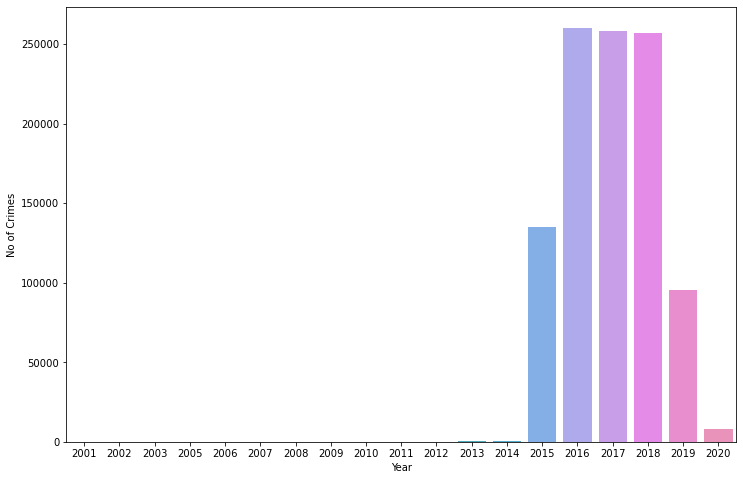

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='Year',data=dataFrame)
plt.ylabel('No of Crimes')
plt.show()

In [15]:
# Since we do not have crimes in starting years so we drop them 2020
# selecting the dataset which starts from 2015
dataFrame=dataFrame[dataFrame['Year']>=2015]
dataFrame=dataFrame[dataFrame['Year']<2020]
dataFrame

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,9/5/2015 13:30,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,9/4/2015 11:30,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,9/5/2015 12:45,NARCOTICS,SIDEWALK,True,False,1412,14.0,35.0,21.0,1152037.0,1920384.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,9/5/2015 13:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,9/5/2015 10:55,BURGLARY,RESIDENCE,False,False,614,6.0,21.0,71.0,1168430.0,1850165.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047961,11870906,10/24/2019 11:45,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"
1048464,11580899,1/29/2019 19:00,MOTOR VEHICLE THEFT,STREET,False,False,2533,25.0,37.0,25.0,1142432.0,1908180.0,2019,41.904101,-87.752254,"(41.904100882, -87.752253974)"
1048488,11870601,10/24/2019 6:36,BURGLARY,RESIDENTIAL YARD (FRONT/BACK),True,False,312,3.0,20.0,42.0,1180341.0,1863044.0,2019,41.779456,-87.614393,"(41.779455579, -87.614393194)"
1048517,10070330,5/12/2015 17:58,DECEPTIVE PRACTICE,BANK,False,False,632,6.0,6.0,44.0,1182609.0,1847455.0,2015,41.736625,-87.606561,"(41.736625423, -87.60656135)"


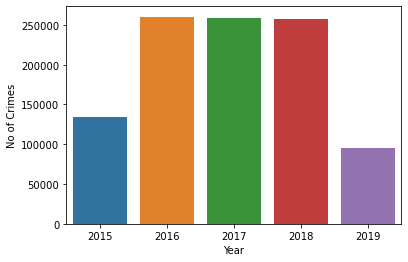

In [16]:
sns.countplot(x='Year',data=dataFrame)
plt.ylabel('No of Crimes')
plt.show()

In [17]:
# # listing the crimes type wise with their counts
types=dataFrame['Primary Type'].value_counts().sort_values(ascending=False)
types

THEFT                                236146
BATTERY                              189082
CRIMINAL DAMAGE                      112272
ASSAULT                               72717
OTHER OFFENSE                         66515
DECEPTIVE PRACTICE                    64768
NARCOTICS                             53048
BURGLARY                              49165
MOTOR VEHICLE THEFT                   41016
ROBBERY                               40980
CRIMINAL TRESPASS                     25649
WEAPONS VIOLATION                     17546
OFFENSE INVOLVING CHILDREN             8212
PUBLIC PEACE VIOLATION                 6223
CRIM SEXUAL ASSAULT                    5145
INTERFERENCE WITH PUBLIC OFFICER       4500
SEX OFFENSE                            3710
PROSTITUTION                           3021
ARSON                                  1630
LIQUOR LAW VIOLATION                    892
GAMBLING                                753
KIDNAPPING                              734
STALKING                        

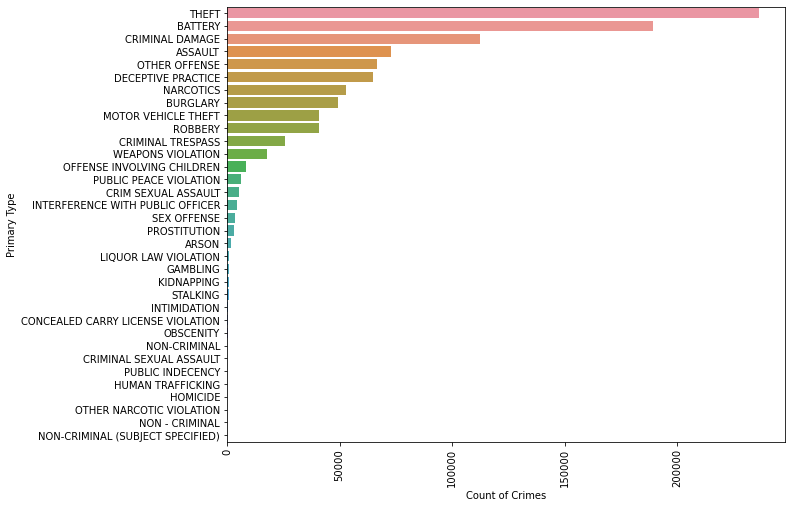

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataFrame, y="Primary Type", order=dataFrame['Primary Type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Count of Crimes')
plt.show()

In [19]:
fourMajorTypes=dataFrame['Primary Type'].value_counts().sort_values(ascending=False)
fourMajorTypes=fourMajorTypes[:4]
fourMajorTypes


THEFT              236146
BATTERY            189082
CRIMINAL DAMAGE    112272
ASSAULT             72717
Name: Primary Type, dtype: int64

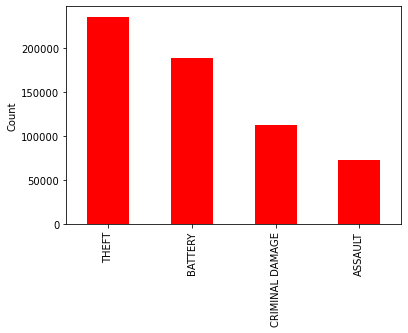

In [20]:
fourMajorTypes.plot(kind='bar',color='red')
plt.ylabel('Count')
plt.show()

In [21]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT']

In [22]:
# crime types according to their counts in dataframe
# 15 classes
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY','MOTOR VEHICLE THEFT'
#               ,'ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','OFFENSE INVOLVING CHILDREN','PUBLIC PEACE VIOLATION','CRIM SEXUAL ASSAULT']
# 8 classes
# storing major crime types according to their counts in dataframe
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY']

In [23]:
# selecting the data form our dataset that belongs major crime classes
crime_df = dataFrame.loc[dataFrame['Primary Type'] .isin(major_crimes)]
crime_df

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,9/5/2015 13:30,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,9/4/2015 11:30,THEFT,CTA BUS,False,False,1511,15.0,29.0,25.0,1138875.0,1904869.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,10224741,9/5/2015 13:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,10224744,9/5/2015 13:00,THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,1159734.0,1889313.0,2015,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,10224746,9/5/2015 14:00,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,1150938.0,1857056.0,2015,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,11871605,10/24/2019 8:48,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,11874952,10/23/2019 20:00,THEFT,STREET,False,False,2422,24.0,49.0,1.0,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,10070329,5/13/2015 15:00,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,11870906,10/24/2019 11:45,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [24]:
loc=crime_df['Location Description'].value_counts().sort_values(ascending=False)
loc=loc[:20]
loc
# tempr=yearDF.groupby('Location Description')['ID'].count().sort_values(ascending=False)
# tempr=temp[:10]
# tempr

STREET                            133169
RESIDENCE                          89732
APARTMENT                          86916
SIDEWALK                           44879
OTHER                              21271
PARKING LOT/GARAGE(NON.RESID.)     21258
SMALL RETAIL STORE                 18840
RESTAURANT                         16864
RESIDENTIAL YARD (FRONT/BACK)      14263
RESIDENCE PORCH/HALLWAY            14242
DEPARTMENT STORE                   14181
VEHICLE NON-COMMERCIAL             11612
SCHOOL, PUBLIC, BUILDING           10479
GROCERY FOOD STORE                 10286
ALLEY                               9018
RESIDENCE-GARAGE                    7268
GAS STATION                         6943
BAR OR TAVERN                       6151
CTA TRAIN                           5218
PARK PROPERTY                       5020
Name: Location Description, dtype: int64

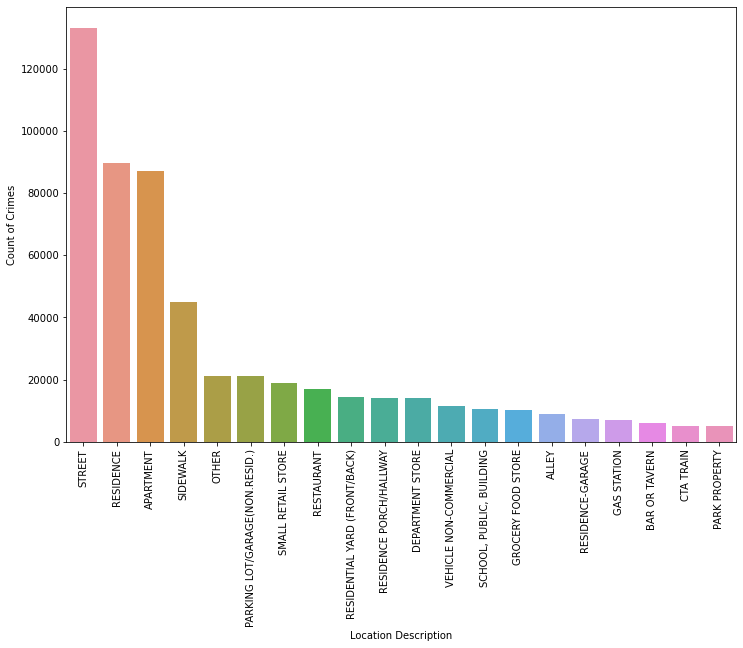

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(data=crime_df, x="Location Description", order=loc.index)
plt.xticks(rotation='vertical')
plt.ylabel('Count of Crimes')
plt.show()

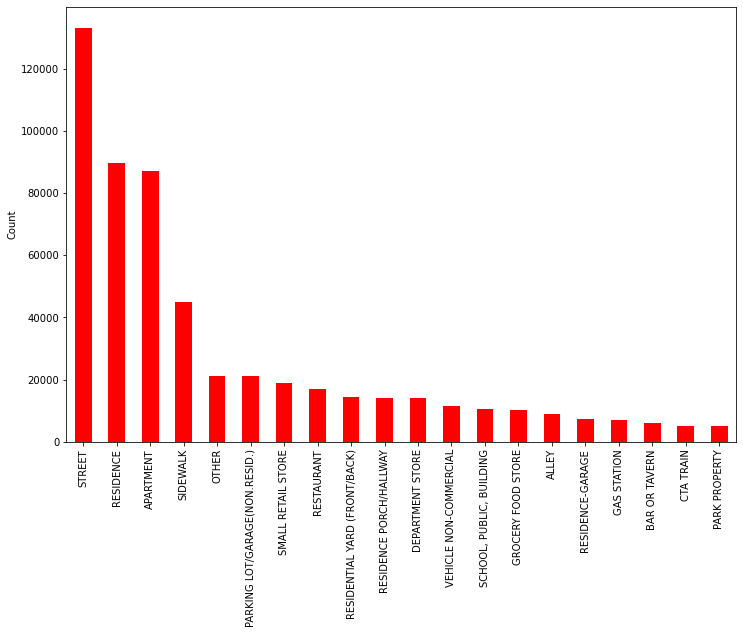

In [26]:
plt.figure(figsize=(12,8))
loc.plot(kind='bar',color='red')
plt.ylabel('Count')
plt.show()

In [27]:
# storing four major 4 locations
major_loc = ['STREET','RESIDENCE', 'APARTMENT','SIDEWALK']

In [28]:
# selecting the data form our dataset that belongs major locations
crime_df = crime_df.loc[crime_df['Location Description'] .isin(major_loc)]
crime_df

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,9/5/2015 13:30,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
4,10224741,9/5/2015 13:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
13,10224751,9/5/2015 12:50,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1185907.0,1874105.0,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)"
14,10224752,9/3/2015 13:00,THEFT,STREET,False,False,1424,14.0,1.0,24.0,1162574.0,1909428.0,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)"
15,10224753,9/5/2015 11:45,BATTERY,APARTMENT,False,False,612,6.0,21.0,71.0,1167400.0,1851512.0,2015,41.748097,-87.662166,"(41.748097343, -87.662166183)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,11871605,10/24/2019 8:48,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,11874952,10/23/2019 20:00,THEFT,STREET,False,False,2422,24.0,49.0,1.0,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,10070329,5/13/2015 15:00,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,11870906,10/24/2019 11:45,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [29]:
graphDF=crime_df.copy()
graphDF

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,9/5/2015 13:30,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
4,10224741,9/5/2015 13:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
13,10224751,9/5/2015 12:50,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1185907.0,1874105.0,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)"
14,10224752,9/3/2015 13:00,THEFT,STREET,False,False,1424,14.0,1.0,24.0,1162574.0,1909428.0,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)"
15,10224753,9/5/2015 11:45,BATTERY,APARTMENT,False,False,612,6.0,21.0,71.0,1167400.0,1851512.0,2015,41.748097,-87.662166,"(41.748097343, -87.662166183)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,11871605,10/24/2019 8:48,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,11874952,10/23/2019 20:00,THEFT,STREET,False,False,2422,24.0,49.0,1.0,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,10070329,5/13/2015 15:00,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,11870906,10/24/2019 11:45,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [30]:
graphDF['Date'] = pd.to_datetime(graphDF['Date'])
graphDF

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10224738,2015-09-05 13:30:00,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
4,10224741,2015-09-05 13:00:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
13,10224751,2015-09-05 12:50:00,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1185907.0,1874105.0,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)"
14,10224752,2015-09-03 13:00:00,THEFT,STREET,False,False,1424,14.0,1.0,24.0,1162574.0,1909428.0,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)"
15,10224753,2015-09-05 11:45:00,BATTERY,APARTMENT,False,False,612,6.0,21.0,71.0,1167400.0,1851512.0,2015,41.748097,-87.662166,"(41.748097343, -87.662166183)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,11871605,2019-10-24 08:48:00,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)"
1047778,11874952,2019-10-23 20:00:00,THEFT,STREET,False,False,2422,24.0,49.0,1.0,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)"
1047805,10070329,2015-05-13 15:00:00,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)"
1047961,11870906,2019-10-24 11:45:00,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)"


In [31]:
# datetime.strptime('07/28/2014 18:54:55.099000', '%m/%d/%Y %H:%M:%S.%f')

graphDF['Date'] = pd.to_datetime(graphDF['Date'],format='%m/%d/%Y %I:%M:%S %p')

In [32]:
# graphDF['Date'] = datetime.strptime(graphDF['Date'],'%m/%d/%Y %H:%M:%S.%f')
# 
# '%m/%d/%Y %H:%M:%S.%f'

In [33]:
import calendar
graphDF['Month']=(graphDF['Date'].dt.month).apply(lambda x: calendar.month_abbr[x])
graphDF.head(4)

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month
0,10224738,2015-09-05 13:30:00,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",Sep
4,10224741,2015-09-05 13:00:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",Sep
13,10224751,2015-09-05 12:50:00,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1185907.0,1874105.0,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)",Sep
14,10224752,2015-09-03 13:00:00,THEFT,STREET,False,False,1424,14.0,1.0,24.0,1162574.0,1909428.0,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)",Sep


In [34]:
# storing the categories of months

graphDF['Month'] = pd.Categorical(graphDF['Month'] , categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

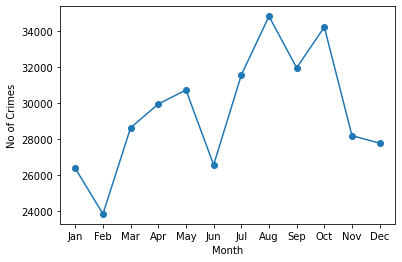

In [35]:
import numpy as np
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
graphDF.groupby('Month')['ID'].count().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

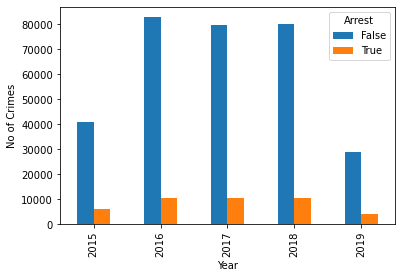

In [36]:
graphDF.groupby(['Year','Arrest'])['ID'].count().unstack().plot(kind='bar')
plt.ylabel('No of Crimes')
plt.show()

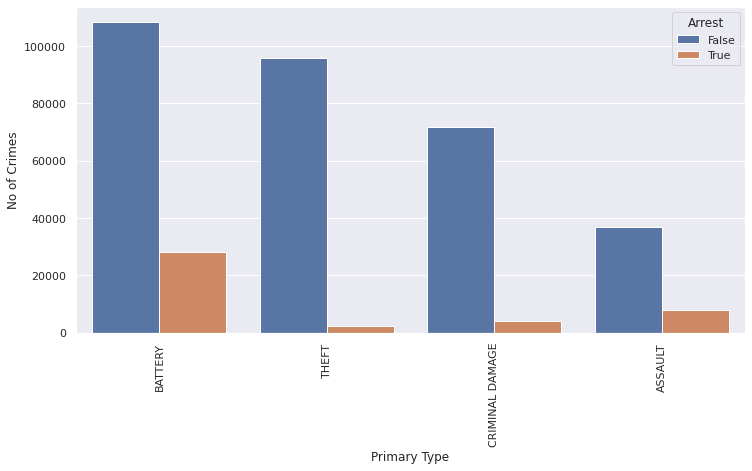

In [37]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Primary Type',hue='Arrest',data=graphDF,order=graphDF['Primary Type'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()

In [38]:
temp=graphDF.copy()
temp

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month
0,10224738,2015-09-05 13:30:00,BATTERY,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",Sep
4,10224741,2015-09-05 13:00:00,ASSAULT,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",Sep
13,10224751,2015-09-05 12:50:00,BATTERY,STREET,False,True,222,2.0,4.0,39.0,1185907.0,1874105.0,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)",Sep
14,10224752,2015-09-03 13:00:00,THEFT,STREET,False,False,1424,14.0,1.0,24.0,1162574.0,1909428.0,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)",Sep
15,10224753,2015-09-05 11:45:00,BATTERY,APARTMENT,False,False,612,6.0,21.0,71.0,1167400.0,1851512.0,2015,41.748097,-87.662166,"(41.748097343, -87.662166183)",Sep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,11871605,2019-10-24 08:48:00,BATTERY,SIDEWALK,False,True,121,1.0,42.0,28.0,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)",Oct
1047778,11874952,2019-10-23 20:00:00,THEFT,STREET,False,False,2422,24.0,49.0,1.0,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)",Oct
1047805,10070329,2015-05-13 15:00:00,THEFT,SIDEWALK,False,False,823,8.0,13.0,65.0,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)",May
1047961,11870906,2019-10-24 11:45:00,ASSAULT,RESIDENCE,True,False,623,6.0,6.0,69.0,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)",Oct


In [39]:
def crime_type(t):
    if t =='THEFT': return '0'
    elif t =='BATTERY': return '1'
    elif t =='CRIMINAL DAMAGE': return '2'
    elif t == 'ASSAULT': return '3'
    else: return '-1'

# cp_crime = crime_df.copy()
temp['crimeType'] = temp['Primary Type'].map(crime_type)
temp=temp.drop(columns='Primary Type')
temp

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
0,10224738,2015-09-05 13:30:00,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",Sep,1
4,10224741,2015-09-05 13:00:00,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",Sep,3
13,10224751,2015-09-05 12:50:00,STREET,False,True,222,2.0,4.0,39.0,1185907.0,1874105.0,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)",Sep,1
14,10224752,2015-09-03 13:00:00,STREET,False,False,1424,14.0,1.0,24.0,1162574.0,1909428.0,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)",Sep,0
15,10224753,2015-09-05 11:45:00,APARTMENT,False,False,612,6.0,21.0,71.0,1167400.0,1851512.0,2015,41.748097,-87.662166,"(41.748097343, -87.662166183)",Sep,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,11871605,2019-10-24 08:48:00,SIDEWALK,False,True,121,1.0,42.0,28.0,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)",Oct,1
1047778,11874952,2019-10-23 20:00:00,STREET,False,False,2422,24.0,49.0,1.0,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)",Oct,0
1047805,10070329,2015-05-13 15:00:00,SIDEWALK,False,False,823,8.0,13.0,65.0,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)",May,0
1047961,11870906,2019-10-24 11:45:00,RESIDENCE,True,False,623,6.0,6.0,69.0,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)",Oct,3


In [40]:
# temp.dropna()
temp.dropna(inplace=True)
temp

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
0,10224738,2015-09-05 13:30:00,RESIDENCE,False,True,924,9.0,12.0,61.0,1165074.0,1875917.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)",Sep,1
4,10224741,2015-09-05 13:00:00,APARTMENT,False,True,1522,15.0,28.0,25.0,1141706.0,1900086.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)",Sep,3
13,10224751,2015-09-05 12:50:00,STREET,False,True,222,2.0,4.0,39.0,1185907.0,1874105.0,2015,41.809678,-87.593639,"(41.809678314, -87.593638934)",Sep,1
14,10224752,2015-09-03 13:00:00,STREET,False,False,1424,14.0,1.0,24.0,1162574.0,1909428.0,2015,41.907127,-87.678232,"(41.907127255, -87.678232016)",Sep,0
15,10224753,2015-09-05 11:45:00,APARTMENT,False,False,612,6.0,21.0,71.0,1167400.0,1851512.0,2015,41.748097,-87.662166,"(41.748097343, -87.662166183)",Sep,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047619,11871605,2019-10-24 08:48:00,SIDEWALK,False,True,121,1.0,42.0,28.0,1173039.0,1900311.0,2019,41.881884,-87.640060,"(41.881883933, -87.640060441)",Oct,1
1047778,11874952,2019-10-23 20:00:00,STREET,False,False,2422,24.0,49.0,1.0,1164085.0,1951492.0,2019,42.022521,-87.671488,"(42.022520841, -87.671487901)",Oct,0
1047805,10070329,2015-05-13 15:00:00,SIDEWALK,False,False,823,8.0,13.0,65.0,1151402.0,1864449.0,2015,41.783926,-87.720451,"(41.783926067, -87.720450906)",May,0
1047961,11870906,2019-10-24 11:45:00,RESIDENCE,True,False,623,6.0,6.0,69.0,1179344.0,1854996.0,2019,41.757394,-87.618294,"(41.757393836, -87.618293567)",Oct,3


In [41]:
# count of null values
temp.isna().any(axis=1).sum()

0

In [42]:
# values according to their class count
count=temp['crimeType'].value_counts().sort_values(ascending=False)
count

1    136378
0     97964
2     75809
3     44545
Name: crimeType, dtype: int64

In [43]:
# getting the portion of our data set for random data selection
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

118232

In [44]:
first=temp.iloc[0:portion,:]
first.shape

(118232, 17)

In [45]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(118232, 17)

In [46]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape


(118230, 17)

In [47]:
# picking random 5k enteries from the first part
index=np.random.choice(portion,replace=False,size = 70000)
df_frst=first.iloc[index]
df_frst.shape


(70000, 17)

In [76]:
# picking random 5k enteries from the second half

index=np.random.choice(portion,replace=False,size = 70000)
df_scnd=scnd.iloc[index]
df_scnd


,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
417955,10811653,2017-01-10 16:44:00,RESIDENCE,False,False,731,7.0,6.0,69.0,1176970.0,1857910.0,2017,41.765444,-87.626906,"(41.765444001, -87.626906181)",Jan,3
492308,10956128,2017-05-23 21:00:00,STREET,False,False,2534,25.0,30.0,23.0,1148798.0,1910669.0,2017,41.910810,-87.728805,"(41.910810235, -87.72880536)",May,2
451367,10893620,2017-03-29 03:30:00,APARTMENT,False,True,825,8.0,15.0,66.0,1160758.0,1863839.0,2017,41.782064,-87.686165,"(41.782064021, -87.686164921)",Mar,3
479903,10937864,2017-05-08 07:08:00,APARTMENT,True,False,323,3.0,6.0,69.0,1181798.0,1857892.0,2017,41.765284,-87.609211,"(41.765284436, -87.609210747)",May,2
582875,11056212,2017-08-15 18:00:00,STREET,False,False,1935,19.0,43.0,7.0,1171155.0,1917619.0,2017,41.929420,-87.646470,"(41.929419611, -87.646469508)",Aug,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604067,11085676,2017-09-12 20:00:00,STREET,False,False,113,1.0,2.0,32.0,1176860.0,1898825.0,2017,41.877721,-87.626075,"(41.877720707, -87.626074914)",Sep,0
397562,10779722,2016-12-09 20:00:00,RESIDENCE,True,False,322,3.0,20.0,69.0,1178094.0,1859950.0,2016,41.771017,-87.622725,"(41.771016576, -87.622724617)",Dec,1
485717,10945968,2017-05-15 21:11:00,STREET,True,False,1712,17.0,39.0,14.0,1149521.0,1931663.0,2017,41.968405,-87.725603,"(41.968405494, -87.725602529)",May,2
441135,10877098,2017-03-13 13:54:00,RESIDENCE,False,False,332,3.0,5.0,43.0,1187686.0,1860208.0,2017,41.771502,-87.587556,"(41.771501692, -87.587556105)",Mar,1


In [80]:
# picking random 5k enteries from the third half

index=np.random.choice(portion,replace=False,size = 70000)
df_third=third.iloc[index]
df_third

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
977571,11590233,2019-02-09 03:10:00,SIDEWALK,True,False,1831,18.0,42.0,8.0,1176050.0,1903312.0,2019,41.890052,-87.628914,"(41.890051565, -87.62891376)",Feb,1
685162,11263139,2018-03-21 20:45:00,APARTMENT,True,True,631,6.0,6.0,44.0,1180885.0,1850070.0,2018,41.743841,-87.612797,"(41.743841062, -87.612797254)",Mar,1
712079,11299531,2018-04-29 16:42:00,APARTMENT,False,False,1522,15.0,29.0,25.0,1139074.0,1898956.0,2018,41.878851,-87.764813,"(41.87885083, -87.764813444)",Apr,1
791247,11325555,2018-05-24 19:00:00,SIDEWALK,False,False,2533,25.0,37.0,25.0,1144143.0,1907637.0,2018,41.902579,-87.745983,"(41.902578855, -87.745982614)",May,0
940302,11529823,2018-12-09 04:00:00,STREET,False,False,835,8.0,18.0,66.0,1154984.0,1855854.0,2018,41.760269,-87.707547,"(41.760269253, -87.707547124)",Dec,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885476,11456137,2018-09-10 09:30:00,RESIDENCE,False,False,915,9.0,11.0,34.0,1174816.0,1883445.0,2018,41.835563,-87.634040,"(41.835562853, -87.634039803)",Sep,0
1036330,11679454,2019-05-07 08:00:00,STREET,False,False,212,2.0,3.0,35.0,1178999.0,1881848.0,2019,41.831086,-87.618740,"(41.831086093, -87.618739917)",May,2
691202,11271568,2018-03-30 15:30:00,RESIDENCE,False,False,2515,25.0,31.0,19.0,1141044.0,1916134.0,2018,41.925953,-87.757156,"(41.925953221, -87.757156239)",Mar,3
765264,11431855,2018-08-31 02:22:00,RESIDENCE,False,True,1125,11.0,2.0,27.0,1158078.0,1899241.0,2018,41.879266,-87.695026,"(41.879266257, -87.695026168)",Aug,1


In [81]:
# combined all three dataframe

temp_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df = pd.concat([temp_df,df_third],ignore_index=True)
final_df

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
0,10186778,2015-08-08 19:40:00,APARTMENT,False,False,1234,12.0,25.0,31.0,1163678.0,1889752.0,2015,41.853111,-87.674731,"(41.85311145, -87.674731216)",Aug,2
1,10598258,2016-07-12 12:30:00,APARTMENT,False,False,1012,10.0,24.0,29.0,1149357.0,1890621.0,2016,41.855785,-87.727272,"(41.855785481, -87.727271903)",Jul,0
2,10359876,2015-12-27 10:50:00,STREET,False,False,1111,11.0,37.0,23.0,1147534.0,1906120.0,2015,41.898352,-87.733566,"(41.898351661, -87.733565727)",Dec,3
3,10451070,2016-03-16 21:45:00,STREET,False,False,911,9.0,12.0,58.0,1153447.0,1878842.0,2016,41.823382,-87.712572,"(41.823382247, -87.712571974)",Mar,1
4,10241381,2015-09-19 00:30:00,STREET,False,True,1122,11.0,28.0,26.0,1150715.0,1900142.0,2015,41.881886,-87.722038,"(41.881885787, -87.722038477)",Sep,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,11456137,2018-09-10 09:30:00,RESIDENCE,False,False,915,9.0,11.0,34.0,1174816.0,1883445.0,2018,41.835563,-87.634040,"(41.835562853, -87.634039803)",Sep,0
209996,11679454,2019-05-07 08:00:00,STREET,False,False,212,2.0,3.0,35.0,1178999.0,1881848.0,2019,41.831086,-87.618740,"(41.831086093, -87.618739917)",May,2
209997,11271568,2018-03-30 15:30:00,RESIDENCE,False,False,2515,25.0,31.0,19.0,1141044.0,1916134.0,2018,41.925953,-87.757156,"(41.925953221, -87.757156239)",Mar,3
209998,11431855,2018-08-31 02:22:00,RESIDENCE,False,True,1125,11.0,2.0,27.0,1158078.0,1899241.0,2018,41.879266,-87.695026,"(41.879266257, -87.695026168)",Aug,1


In [82]:
df=final_df.copy()

In [83]:
# Using PCA to combine two features

from sklearn.decomposition import PCA

location = df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
0,10186778,2015-08-08 19:40:00,APARTMENT,False,False,1234,12.0,25.0,31.0,1163678.0,1889752.0,2015,41.853111,-87.674731,0.017577,Aug,2
1,10598258,2016-07-12 12:30:00,APARTMENT,False,False,1012,10.0,24.0,29.0,1149357.0,1890621.0,2016,41.855785,-87.727272,0.044440,Jul,0
2,10359876,2015-12-27 10:50:00,STREET,False,False,1111,11.0,37.0,23.0,1147534.0,1906120.0,2015,41.898352,-87.733566,0.085031,Dec,3
3,10451070,2016-03-16 21:45:00,STREET,False,False,911,9.0,12.0,58.0,1153447.0,1878842.0,2016,41.823382,-87.712572,0.008921,Mar,1
4,10241381,2015-09-19 00:30:00,STREET,False,True,1122,11.0,28.0,26.0,1150715.0,1900142.0,2015,41.881886,-87.722038,0.065090,Sep,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,11456137,2018-09-10 09:30:00,RESIDENCE,False,False,915,9.0,11.0,34.0,1174816.0,1883445.0,2018,41.835563,-87.634040,-0.016920,Sep,0
209996,11679454,2019-05-07 08:00:00,STREET,False,False,212,2.0,3.0,35.0,1178999.0,1881848.0,2019,41.831086,-87.618740,-0.028014,May,2
209997,11271568,2018-03-30 15:30:00,RESIDENCE,False,False,2515,25.0,31.0,19.0,1141044.0,1916134.0,2018,41.925953,-87.757156,0.120448,Mar,3
209998,11431855,2018-08-31 02:22:00,RESIDENCE,False,True,1125,11.0,2.0,27.0,1158078.0,1899241.0,2018,41.879266,-87.695026,0.050178,Aug,1


In [84]:
# convertung date column to actual date format
df.Date=pd.to_datetime(df.Date)

df.head(10)

,ID,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType
0,10186778,2015-08-08 19:40:00,APARTMENT,False,False,1234,12.0,25.0,31.0,1163678.0,1889752.0,2015,41.853111,-87.674731,0.017577,Aug,2
1,10598258,2016-07-12 12:30:00,APARTMENT,False,False,1012,10.0,24.0,29.0,1149357.0,1890621.0,2016,41.855785,-87.727272,0.044440,Jul,0
2,10359876,2015-12-27 10:50:00,STREET,False,False,1111,11.0,37.0,23.0,1147534.0,1906120.0,2015,41.898352,-87.733566,0.085031,Dec,3
3,10451070,2016-03-16 21:45:00,STREET,False,False,911,9.0,12.0,58.0,1153447.0,1878842.0,2016,41.823382,-87.712572,0.008921,Mar,1
4,10241381,2015-09-19 00:30:00,STREET,False,True,1122,11.0,28.0,26.0,1150715.0,1900142.0,2015,41.881886,-87.722038,0.065090,Sep,2
5,10463477,2016-03-27 09:30:00,STREET,False,False,2222,22.0,21.0,73.0,1170590.0,1844279.0,2016,41.728180,-87.650687,-0.104154,Mar,2
6,10194547,2015-08-14 03:57:00,STREET,False,False,1624,16.0,38.0,15.0,1134073.0,1928596.0,2015,41.960276,-87.782477,0.162618,Aug,2
7,10828013,2017-01-25 10:00:00,RESIDENCE,False,False,621,6.0,17.0,71.0,1173306.0,1853661.0,2017,41.753866,-87.640461,-0.086199,Jan,2
8,10487265,2016-04-15 14:30:00,STREET,False,False,823,8.0,15.0,66.0,1156155.0,1861929.0,2016,41.776917,-87.703092,-0.036605,Apr,3
9,10521483,2016-05-13 20:00:00,STREET,False,False,324,3.0,5.0,43.0,1186831.0,1855914.0,2016,41.759739,-87.590826,-0.104146,May,2


In [85]:
# extracting month and weekday from date column
df['month']=df.Date.dt.month
df['weekday'] = df.Date.dt.day_of_week
df=df.drop(columns='Date')
df

,ID,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType,month,weekday
0,10186778,APARTMENT,False,False,1234,12.0,25.0,31.0,1163678.0,1889752.0,2015,41.853111,-87.674731,0.017577,Aug,2,8,5
1,10598258,APARTMENT,False,False,1012,10.0,24.0,29.0,1149357.0,1890621.0,2016,41.855785,-87.727272,0.044440,Jul,0,7,1
2,10359876,STREET,False,False,1111,11.0,37.0,23.0,1147534.0,1906120.0,2015,41.898352,-87.733566,0.085031,Dec,3,12,6
3,10451070,STREET,False,False,911,9.0,12.0,58.0,1153447.0,1878842.0,2016,41.823382,-87.712572,0.008921,Mar,1,3,2
4,10241381,STREET,False,True,1122,11.0,28.0,26.0,1150715.0,1900142.0,2015,41.881886,-87.722038,0.065090,Sep,2,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,11456137,RESIDENCE,False,False,915,9.0,11.0,34.0,1174816.0,1883445.0,2018,41.835563,-87.634040,-0.016920,Sep,0,9,0
209996,11679454,STREET,False,False,212,2.0,3.0,35.0,1178999.0,1881848.0,2019,41.831086,-87.618740,-0.028014,May,2,5,1
209997,11271568,RESIDENCE,False,False,2515,25.0,31.0,19.0,1141044.0,1916134.0,2018,41.925953,-87.757156,0.120448,Mar,3,3,4
209998,11431855,RESIDENCE,False,True,1125,11.0,2.0,27.0,1158078.0,1899241.0,2018,41.879266,-87.695026,0.050178,Aug,1,8,4


In [86]:
cp_crime = df.copy()

In [87]:
# encoding our column with labels to nos
labelEncoder = LabelEncoder()

locDes_enc = labelEncoder.fit_transform(cp_crime['Location Description'])
cp_crime['Location Description'] = locDes_enc

cp_crime.head()

,ID,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType,month,weekday
0,10186778,0,False,False,1234,12.0,25.0,31.0,1163678.0,1889752.0,2015,41.853111,-87.674731,0.017577,Aug,2,8,5
1,10598258,0,False,False,1012,10.0,24.0,29.0,1149357.0,1890621.0,2016,41.855785,-87.727272,0.044440,Jul,0,7,1
2,10359876,3,False,False,1111,11.0,37.0,23.0,1147534.0,1906120.0,2015,41.898352,-87.733566,0.085031,Dec,3,12,6
3,10451070,3,False,False,911,9.0,12.0,58.0,1153447.0,1878842.0,2016,41.823382,-87.712572,0.008921,Mar,1,3,2
4,10241381,3,False,True,1122,11.0,28.0,26.0,1150715.0,1900142.0,2015,41.881886,-87.722038,0.065090,Sep,2,9,5


In [88]:
# encoding our column with labels to nos
labelEncoder2 = LabelEncoder()

arrest_enc = labelEncoder2.fit_transform(cp_crime['Arrest'])
cp_crime['Arrest'] = arrest_enc

cp_crime.head()

,ID,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType,month,weekday
0,10186778,0,0,False,1234,12.0,25.0,31.0,1163678.0,1889752.0,2015,41.853111,-87.674731,0.017577,Aug,2,8,5
1,10598258,0,0,False,1012,10.0,24.0,29.0,1149357.0,1890621.0,2016,41.855785,-87.727272,0.044440,Jul,0,7,1
2,10359876,3,0,False,1111,11.0,37.0,23.0,1147534.0,1906120.0,2015,41.898352,-87.733566,0.085031,Dec,3,12,6
3,10451070,3,0,False,911,9.0,12.0,58.0,1153447.0,1878842.0,2016,41.823382,-87.712572,0.008921,Mar,1,3,2
4,10241381,3,0,True,1122,11.0,28.0,26.0,1150715.0,1900142.0,2015,41.881886,-87.722038,0.065090,Sep,2,9,5


In [89]:
# encoding our column with labels to nos
labelEncoder3 = LabelEncoder()

domestic_enc = labelEncoder3.fit_transform(cp_crime['Domestic'])
cp_crime['Domestic'] = domestic_enc

cp_crime.head()

,ID,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType,month,weekday
0,10186778,0,0,0,1234,12.0,25.0,31.0,1163678.0,1889752.0,2015,41.853111,-87.674731,0.017577,Aug,2,8,5
1,10598258,0,0,0,1012,10.0,24.0,29.0,1149357.0,1890621.0,2016,41.855785,-87.727272,0.044440,Jul,0,7,1
2,10359876,3,0,0,1111,11.0,37.0,23.0,1147534.0,1906120.0,2015,41.898352,-87.733566,0.085031,Dec,3,12,6
3,10451070,3,0,0,911,9.0,12.0,58.0,1153447.0,1878842.0,2016,41.823382,-87.712572,0.008921,Mar,1,3,2
4,10241381,3,0,1,1122,11.0,28.0,26.0,1150715.0,1900142.0,2015,41.881886,-87.722038,0.065090,Sep,2,9,5


In [90]:
# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['Beat']] = scaler.fit_transform(cp_crime[['Beat']])
cp_crime[['Location Description']] = scaler.fit_transform(cp_crime[['Location Description']])
cp_crime[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(cp_crime[['X Coordinate', 'Y Coordinate']])
cp_crime

,ID,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,crimeType,month,weekday
0,10186778,0.000000,0,0,0.463284,12.0,25.0,31.0,0.612633,0.551189,2015,41.853111,-87.674731,0.017577,Aug,2,8,5
1,10598258,0.000000,0,0,0.371700,10.0,24.0,29.0,0.478762,0.557505,2016,41.855785,-87.727272,0.044440,Jul,0,7,1
2,10359876,1.000000,0,0,0.412541,11.0,37.0,23.0,0.461720,0.670145,2015,41.898352,-87.733566,0.085031,Dec,3,12,6
3,10451070,1.000000,0,0,0.330033,9.0,12.0,58.0,0.516994,0.471900,2016,41.823382,-87.712572,0.008921,Mar,1,3,2
4,10241381,1.000000,0,1,0.417079,11.0,28.0,26.0,0.491456,0.626700,2015,41.881886,-87.722038,0.065090,Sep,2,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,11456137,0.333333,0,0,0.331683,9.0,11.0,34.0,0.716750,0.505353,2018,41.835563,-87.634040,-0.016920,Sep,0,9,0
209996,11679454,1.000000,0,0,0.041667,2.0,3.0,35.0,0.755852,0.493746,2019,41.831086,-87.618740,-0.028014,May,2,5,1
209997,11271568,0.333333,0,0,0.991749,25.0,31.0,19.0,0.401053,0.742923,2018,41.925953,-87.757156,0.120448,Mar,3,3,4
209998,11431855,0.333333,0,1,0.418317,11.0,2.0,27.0,0.560285,0.620152,2018,41.879266,-87.695026,0.050178,Aug,1,8,4


In [91]:
# using correlation for the feature selection
corelation = cp_crime.corr()
corelation


,ID,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday
ID,1.000000,-0.027381,-0.004832,0.014413,-0.000400,-0.000396,0.008509,-0.003653,0.011675,0.000779,0.969318,0.000732,0.011802,-0.002797,-0.072266,-0.005287
Location Description,-0.027381,1.000000,-0.108844,-0.406152,0.070873,0.071028,0.065748,-0.094623,-0.042442,0.100865,-0.033576,0.100810,-0.041194,0.092942,0.032379,-0.011568
Arrest,-0.004832,-0.108844,1.000000,0.150799,-0.022499,-0.022571,-0.016374,0.031964,0.015655,-0.039336,0.001133,-0.039309,0.015169,-0.035985,-0.014598,0.012525
Domestic,0.014413,-0.406152,0.150799,1.000000,-0.079722,-0.079850,-0.086829,0.123525,0.010206,-0.134643,0.020587,-0.134379,0.008152,-0.110474,-0.021494,0.026515
Beat,-0.000400,0.070873,-0.022499,-0.079722,1.000000,0.999876,0.709396,-0.523640,-0.593452,0.672879,-0.002720,0.673650,-0.588506,0.710955,0.007805,0.016275
District,-0.000396,0.071028,-0.022571,-0.079850,0.999876,1.000000,0.710889,-0.524036,-0.594699,0.674141,-0.002735,0.674913,-0.589745,0.712327,0.007895,0.016215
Ward,0.008509,0.065748,-0.016374,-0.086829,0.709396,0.710889,1.000000,-0.553905,-0.510364,0.665043,0.006108,0.665505,-0.504769,0.680372,0.006733,0.010142
Community Area,-0.003653,-0.094623,0.031964,0.123525,-0.523640,-0.524036,-0.553905,1.000000,0.340376,-0.801499,0.000150,-0.800938,0.331321,-0.739586,-0.012355,-0.011519
X Coordinate,0.011675,-0.042442,0.015655,0.010206,-0.593452,-0.594699,-0.510364,0.340376,1.000000,-0.592375,0.010917,-0.594916,0.999923,-0.765652,0.000457,-0.013404
Y Coordinate,0.000779,0.100865,-0.039336,-0.134643,0.672879,0.674141,0.665043,-0.801499,-0.592375,1.000000,-0.002598,0.999995,-0.582354,0.971799,0.011041,0.010168


<AxesSubplot:>

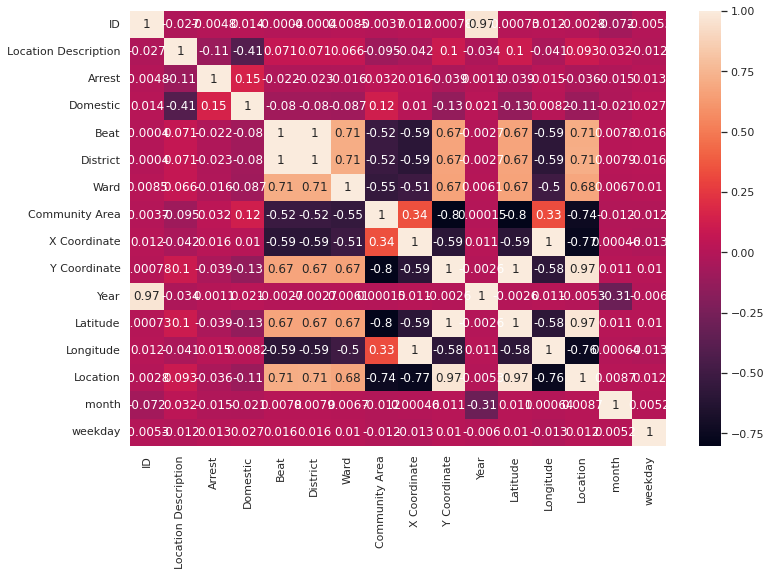

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(corelation,annot=True)

In [93]:
# month week day have low correlation they isn't effect our results so we drop them
# since beat have high correlation with district so we drop beat
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude
# 'Beat'
selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','X Coordinate','Y Coordinate','Year'] 


In [94]:
X=cp_crime[selected_cols]
Y=cp_crime['crimeType']

In [95]:
X

,Location Description,Arrest,Domestic,Beat,Ward,X Coordinate,Y Coordinate,Year
0,0.000000,0,0,0.463284,25.0,0.612633,0.551189,2015
1,0.000000,0,0,0.371700,24.0,0.478762,0.557505,2016
2,1.000000,0,0,0.412541,37.0,0.461720,0.670145,2015
3,1.000000,0,0,0.330033,12.0,0.516994,0.471900,2016
4,1.000000,0,1,0.417079,28.0,0.491456,0.626700,2015
...,...,...,...,...,...,...,...,...
209995,0.333333,0,0,0.331683,11.0,0.716750,0.505353,2018
209996,1.000000,0,0,0.041667,3.0,0.755852,0.493746,2019
209997,0.333333,0,0,0.991749,31.0,0.401053,0.742923,2018
209998,0.333333,0,1,0.418317,2.0,0.560285,0.620152,2018


In [96]:
from collections import Counter
counter=Counter(Y)

In [97]:
# before oversampling
print(Counter(Y))

Counter({'1': 80805, '0': 57933, '2': 44800, '3': 26462})


In [98]:
# Total classes
np.unique(Y)

array(['0', '1', '2', '3'], dtype=object)

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
# oversampling using SMOTE
oversample= SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [101]:
# After overSampling
print(Counter(Y))

Counter({'2': 80805, '0': 80805, '3': 80805, '1': 80805})


In [102]:
X

,Location Description,Arrest,Domestic,Beat,Ward,X Coordinate,Y Coordinate,Year
0,0.000000,0,0,0.463284,25.0,0.612633,0.551189,2015
1,0.000000,0,0,0.371700,24.0,0.478762,0.557505,2016
2,1.000000,0,0,0.412541,37.0,0.461720,0.670145,2015
3,1.000000,0,0,0.330033,12.0,0.516994,0.471900,2016
4,1.000000,0,1,0.417079,28.0,0.491456,0.626700,2015
...,...,...,...,...,...,...,...,...
323215,0.333333,0,1,0.211634,6.0,0.774525,0.292159,2015
323216,0.333333,0,1,0.419248,28.0,0.457278,0.619178,2015
323217,1.000000,0,0,0.540429,26.0,0.527060,0.705147,2019
323218,0.000000,1,0,0.385008,28.0,0.560638,0.589831,2017


In [103]:
Y.isna().any(axis=0).sum()

0

In [104]:
# Oversmpling means that the majority class had 1,000 examples and the minority class had 100,
# this strategy would oversampling the minority class so that it has 1,000 examples.
# our majority class has 5815 so after oversampling every class has 5815 entries
# oversampling
# oversample=RandomOverSampler()
# steps = [("o", oversample)]
# # steps = [("u", undersample)]

# pipeline = Pipeline( steps )
# X,Y = pipeline.fit_resample(X,Y)

In [105]:
Y=Y.astype(int)
Y.dtype

dtype('int64')

In [106]:
for c in selected_cols:
    print(f'{c}:{len(cp_crime[c].unique())}')


Location Description:4
Arrest:2
Domestic:2
Beat:273
Ward:50
X Coordinate:49217
Y Coordinate:69182
Year:5


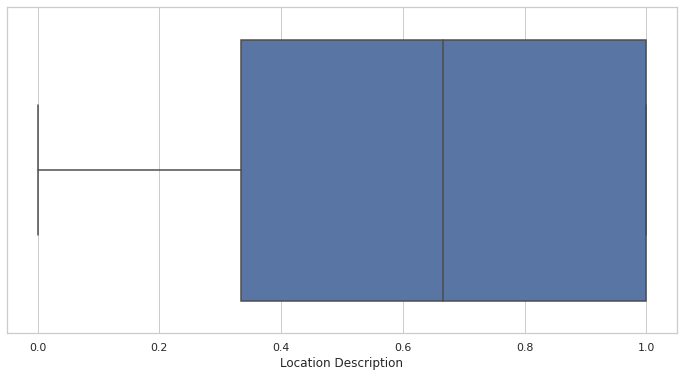

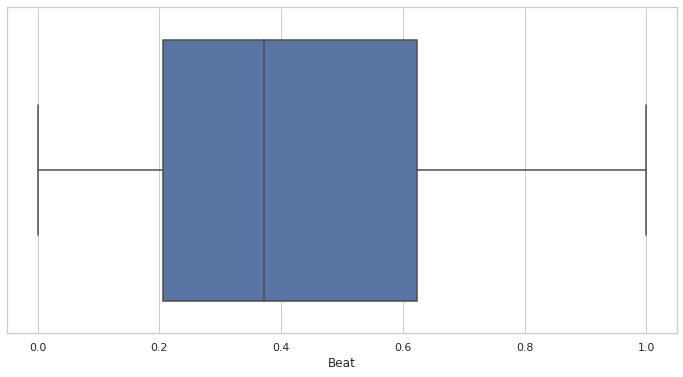

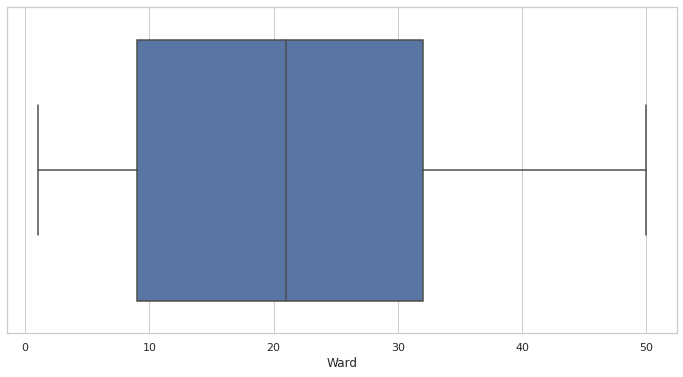

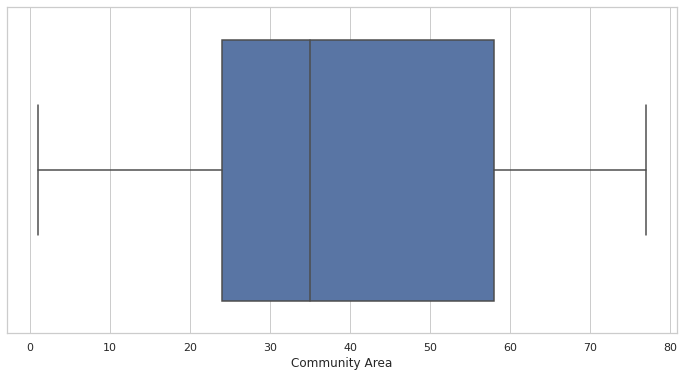

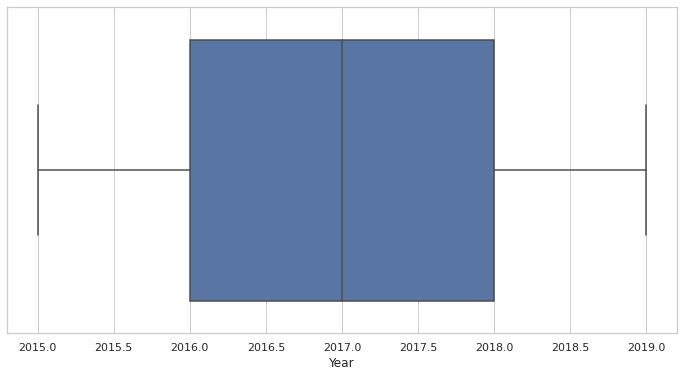

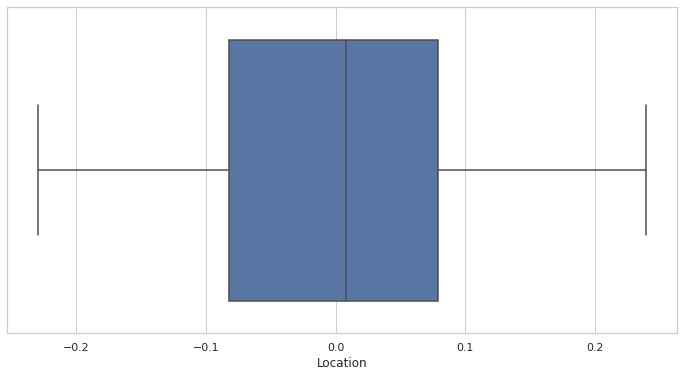

In [107]:
sns.set_theme(style="whitegrid")
#dropping domestic, x coordinate and y coordinate on the basis of correlation map
selected_cols=['Location Description','Arrest','Beat','Ward','Community Area','Year','Location']      
sns.boxplot(x=cp_crime['Location Description'])
plt.show()
sns.boxplot(x=cp_crime['Beat'])
plt.show()
sns.boxplot(x=cp_crime['Ward'])
plt.show()
sns.boxplot(x=cp_crime['Community Area'])
plt.show()
sns.boxplot(x=cp_crime['Year'])
plt.show()
sns.boxplot(x=cp_crime['Location'])
plt.show()

In [108]:
#for xg boost
# Y=Y.map({1:0,2:1,3:2,4:3})

In [109]:
# Tarining and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , Y , test_size = 0.2, random_state=0)

In [110]:
# y_train.count_value

In [111]:
# Models used
# 1- Logistic Regression
# 2- Naive Bayes
# 3- XG Boost
# 4- Random Forest
# 5- Knn
# 6- SVM
# 7- Ada Boost
# 8- Decision Tree Classifier (J48)

In [112]:
from sklearn.metrics import classification_report

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [353]:
# para=[{"max_iter":[1,10,100,100]}]
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    }

In [354]:
logreg = LogisticRegression(max_iter=12000,class_weight='balanced')
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=3)                     # number of folds

In [355]:
clf.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=12000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [356]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2'}
Accuracy : 0.42196561196459453


In [357]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="sag",max_iter=12000,class_weight='balanced',penalty = 'l2',C = 1.0)
lr.fit(X_train, y_train)
pred_labels = lr.predict(X_test)
print('--------------------------------------------------------')
score = lr.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_labels))
# print('Accuracy of Logistic Regression', lr.score(X_test, y_test))

--------------------------------------------------------
Accuracy Score:  0.4315363954529423
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.61      0.50     18554
           1       0.51      0.60      0.56     18459
           2       0.35      0.40      0.37     18297
           3       0.46      0.11      0.18     18408

    accuracy                           0.43     73718
   macro avg       0.44      0.43      0.40     73718
weighted avg       0.44      0.43      0.40     73718



In [358]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_labels = gnb.predict(X_test)

 # Use score method to get accuracy of the model
print('--------------------------------------------------------')
score = gnb.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_labels))
# print('Accuracy of Naive Bayes', gnb.score(X_test, y_test))

--------------------------------------------------------
Accuracy Score:  0.4177270137551209
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.37      0.84      0.52     18554
           1       0.52      0.60      0.56     18459
           2       0.38      0.11      0.17     18297
           3       0.43      0.11      0.17     18408

    accuracy                           0.42     73718
   macro avg       0.42      0.42      0.36     73718
weighted avg       0.42      0.42      0.36     73718



In [359]:
#  Categoric Naivee Bayes

from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB(min_categories=4)
cnb.fit(X_train,y_train)
pred_labels = cnb.predict(X_test)
print('--------------------------------------------------------')
score = cnb.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_labels))
# print('Accuracy of Categoric Naive Byaes', cnb.score(X_test, y_test))    

--------------------------------------------------------
Accuracy Score:  0.4296779619631569
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.52      0.49     18554
           1       0.52      0.58      0.55     18459
           2       0.36      0.33      0.35     18297
           3       0.34      0.28      0.31     18408

    accuracy                           0.43     73718
   macro avg       0.42      0.43      0.42     73718
weighted avg       0.42      0.43      0.42     73718



In [360]:
error_rate = []

krange = range(1,10,1)
for i in krange:
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights = 'uniform',n_jobs= -1) 
    knn.fit(X_train,y_train)
    predicted_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(' Neighbours  ',i)
    print('Test accuracy ', metrics.accuracy_score(y_train, predicted_train))
    print('Accuracy ', metrics.accuracy_score(y_test, pred_i))

 Neighbours   1
Test accuracy  0.9778512564859091
Accuracy  0.5623321305515614
 Neighbours   2
Test accuracy  0.7793400481568149
Accuracy  0.5223554627092434
 Neighbours   3
Test accuracy  0.7523484925560416
Accuracy  0.5424726661059714
 Neighbours   4
Test accuracy  0.7101434530471055
Accuracy  0.5409804932309612
 Neighbours   5
Test accuracy  0.6852613015905314
Accuracy  0.5389592772457201
 Neighbours   6
Test accuracy  0.6632549937260488
Accuracy  0.5331398030331805
 Neighbours   7
Test accuracy  0.6482517719673077
Accuracy  0.5317968474456714
 Neighbours   8
Test accuracy  0.633658900532438
Accuracy  0.529110936270653
 Neighbours   9
Test accuracy  0.6228643130871231
Accuracy  0.5257331994899482


Text(0, 0.5, 'Error Rate')

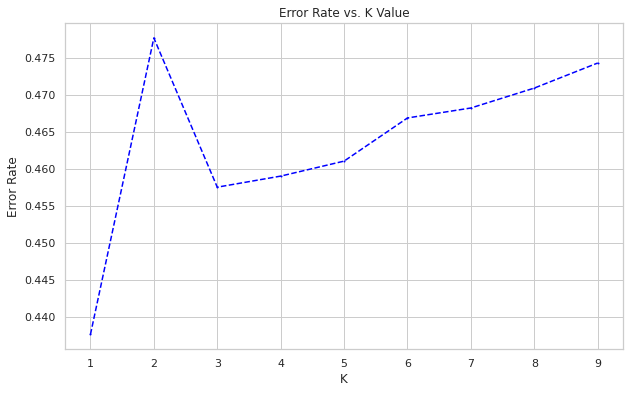

In [361]:
# elbow method to check best amount of neighbours
plt.figure(figsize=(10,6))

plt.plot(krange,error_rate, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# by looking at the figure at 1 error is minimum
# after that at 2 it  increases drastically than show a gradual decrease
# so we chooose K size 1

In [362]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 1,metric='manhattan', weights = 'uniform')
knn.fit(X_train, y_train)
pred_train = knn.predict(X_train)
pred_i = knn.predict(X_test)

 # Use score method to get accuracy of the model
print('--------------------------------------------------------')
score = knn.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_i))

print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))

--------------------------------------------------------
Accuracy Score:  0.5623321305515614
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.56      0.56     18554
           1       0.54      0.53      0.54     18459
           2       0.55      0.57      0.56     18297
           3       0.60      0.60      0.60     18408

    accuracy                           0.56     73718
   macro avg       0.56      0.56      0.56     73718
weighted avg       0.56      0.56      0.56     73718

Test accuracy  0.9778512564859091
Accuracy  0.5623321305515614


In [113]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')

In [114]:
# For HyperTuning
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV( svm ,
#{
#    'C': [1,10,20],
#    'kernel': ['rbf','linear']
#}, cv=5, return_train_score=False)



In [115]:
#clf.fit(X_train, y_train)

In [116]:
#clf.cv_results_

In [117]:
#dataframe = pd.DataFrame(clf.cv_results_)
#dataframe

In [ ]:
# SVM
svm = SVC(gamma='auto',kernel='rbf',class_weight='balanced')
svm.fit(X_train, y_train)
print('Accuracy of SVM', svm.score(X_test, y_test))

In [ ]:
pred_train = svm.predict(X_train)
pred_i = svm.predict(X_test)
print('--------------------------------------------------------')
print(' SVM ')
print('--------------------------------------------------------')
print(classification_report(y_test, pred_i))

In [370]:
# SVM

#from sklearn.model_selection import cross_val_score
#score=cross_val_score(svm,X_train, y_train,cv=3)
#print('Cross Validation: ',score.mean())

In [371]:
# for xgboost
Y=Y.map({1:0,2:1,3:2,4:3})

In [372]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [373]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [374]:
# Calculate the accuracy
import xgboost as xgb
xgb = xgb.XGBClassifier()
#xgb.set_params(n_estimators=10)
random_search=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train, y_train)
# Fit it to the training set


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [375]:
print(random_search.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [376]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [377]:
xgb=xgb.set_params(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=7,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0)
xgb.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("XG Boost accuracy:", accuracy)

XG Boost accuracy: 0.5452535337366722


In [378]:
pred_train = xgb.predict(X_train)
pred_i = xgb.predict(X_test)
print('--------------------------------------------------------')
print(' Xgb Report ')
print('--------------------------------------------------------')
print(classification_report(y_test, pred_i))

--------------------------------------------------------
 Xgb Report 
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.52      0.53     18554
           1       0.61      0.70      0.65     18459
           2       0.44      0.53      0.48     18297
           3       0.63      0.43      0.51     18408

    accuracy                           0.55     73718
   macro avg       0.56      0.55      0.54     73718
weighted avg       0.56      0.55      0.54     73718



In [379]:
# print(xgb)

In [380]:
y_train.unique()

array([1, 3, 2, 0])

In [381]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 300) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.5907512412165279


In [382]:
pred_train = clf.predict(X_train)
pred_i = clf.predict(X_test)
print('--------------------------------------------------------')
print(' Random Forest Report ')
print('--------------------------------------------------------')
print(classification_report(y_test, pred_i))

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=nan total time= 3.0min
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=nan total time= 1.8min


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/c

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=nan total time= 3.0min
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=nan total time= 1.9min


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/c

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=nan total time= 3.1min
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=nan total time= 1.1min
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=nan total time=  53.1s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=nan total time= 3.0min
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=nan total time= 1.1min
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=nan total time= 1.0min


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/c

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=nan total time= 1.4min
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=nan total time= 1.8min
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=nan total time= 1.1min
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=nan total time=  54.5s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/c

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5;, score=nan total time= 3.0min
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=nan total time= 1.1min
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1;, score=nan total time= 1.1min
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=nan total time= 1.4min
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=nan total time= 1.4min
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=nan total time= 1.8min
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=nan total time=  42.5s


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/c

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=nan total time= 1.4min
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=5;, score=nan total time= 1.4min
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=1;, score=nan total time= 1.8min
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1;, score=nan total time=  47.7s
--------------------------------------------------------
 Random Forest Report 
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.58      0.58     18554
           1       0.59      0.61      0.60     18459
           2       0.56      0.56      0.56     18297
           3       0.64      0.61      0.62     18408

    accuracy                           0.59     73718
   macro avg       0.5

In [383]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

total_datapoints = X_test.shape[0]
mislabeled_datapoints = (y_test != y_pred).sum()
correct_datapoints = total_datapoints-mislabeled_datapoints
percent_correct = (correct_datapoints / total_datapoints) * 100

print("DecisionTreeClassifier results for NSL-KDD:\n")
print("Total datapoints: %d\nCorrect datapoints: %d\nMislabeled datapoints: %d\nPercent correct: %.2f%%"
      % (total_datapoints, correct_datapoints, mislabeled_datapoints, percent_correct))


DecisionTreeClassifier results for NSL-KDD:

Total datapoints: 73718
Correct datapoints: 38431
Mislabeled datapoints: 35287
Percent correct: 52.13%


In [384]:
print("ACCURACY OF THE Decision Tree Classifier: ", metrics.accuracy_score(y_test, y_pred))
pred_train = tree.predict(X_train)
pred_i = tree.predict(X_test)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_i))

ACCURACY OF THE Decision Tree Classifier:  0.5213245069046909
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.52      0.51     18554
           1       0.53      0.54      0.53     18459
           2       0.49      0.50      0.50     18297
           3       0.56      0.53      0.54     18408

    accuracy                           0.52     73718
   macro avg       0.52      0.52      0.52     73718
weighted avg       0.52      0.52      0.52     73718



In [385]:
# Decision Tree Classifier (J48)

# from sklearn.metrics import accuracy_score


# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1000)


# j48 = DecisionTreeClassifier(criterion = "gini",random_state = 1000,max_depth=500, min_samples_leaf=600)
# j48.fit(X_train, y_train)
# print(j48)
             
# clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 1000,max_depth = 500, min_samples_leaf = 600)
# clf_entropy.fit(X_train, y_train)
# print(clf_entropy)
             
# y_pred = j48.predict(X_test)
# # print("Predicted values:")
# print(y_pred)
             
# print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
# print ("Accuracy : ",accuracy_score(y_test,y_pred))
# print("Report : ",classification_report(y_test, y_pred))

             

In [386]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
adb = AdaBoostClassifier(n_estimators=300,  learning_rate=1)
# Train Adaboost Classifer
model = adb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [387]:
print("Accuracy OF Ada Boost:",metrics.accuracy_score(y_test, y_pred))
pred_train = adb.predict(X_train)
pred_i = adb.predict(X_test)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_i))

Accuracy OF Ada Boost: 0.4583141159553976
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.46      0.47     18554
           1       0.52      0.62      0.57     18459
           2       0.38      0.56      0.45     18297
           3       0.46      0.20      0.27     18408

    accuracy                           0.46     73718
   macro avg       0.46      0.46      0.44     73718
weighted avg       0.46      0.46      0.44     73718



In [388]:
# Using Cross Validation
# Models used
# 1- Logistic Regression
# 2- Naive Bayes
# 3- XG Boost
# 4- Random Forest
# 5- Knn
# 6- SVM
# 7- Ada Boost
# 8- Decision Tree Classifier (J48)

In [389]:
# # XG Boost

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(xgb,X_train, y_train,cv=10)
# score
# print('XG boost Using Cross Validation: ',score.mean())

In [ ]:
# # Logistic Regression

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(lr,X_train, y_train,cv=10)
# score
# print('Logistic Regression boost Using Cross Validation: ',score.mean())

In [ ]:
# # Naive Bayes

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(gnb,X_train, y_train,cv=10)
# score
# print('Naive Bayes Using Cross Validation: ',score.mean())

In [ ]:
# # Categoric Naive Bayes

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(cnb,X_train, y_train,cv=10)
# score
# print('Categoric Naive Bayes Using Cross Validation: ',score.mean())

In [ ]:
# # KNN

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(knn,X_train, y_train,cv=10)
# score
# print('KNN Using Cross Validation: ',score.mean())

In [ ]:
# # Random Forest

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(clf,X_train, y_train,cv=10)
# score
# print('Random Forest Using Cross Validation: ',score.mean())

In [ ]:
# # SVM

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(svm,X_train, y_train,cv=10)
# score
# print('Random Forest Using Cross Validation: ',score.mean())

In [ ]:
# # Decision Tree

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(tree,X_train, y_train,cv=10)
# score
# print('Decision Using Cross Validation: ',score.mean())

In [ ]:
# # Decision Tree Classifier (J48)

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(j48,X_train, y_train,cv=10)
# score
# print('J46 Using Cross Validation: ',score.mean())

In [ ]:
# # Ada Boost

# from sklearn.model_selection import cross_val_score
# score=cross_val_score(adb,X_train, y_train,cv=10)
# score
# print('Ada BoostUsing Cross Validation: ',score.mean())

In [ ]:
# Deep Learning IMplemntation

In [ ]:
X

In [ ]:
Y

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers


In [ ]:
# import keras

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# from tensorflow.keras import optimizers
# # from keras.optimizers 

In [ ]:
X_train.shape[0]

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras==2.6.0 

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("target")
train_stats = train_stats.transpose()
train_stats

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape = (X_train.shape[1],)))
model.add(Dense(16, activation='relu')) 
model.add(Dense(16, activation='relu')) 
model.add(Dense(16, activation='relu')) 
model.add(Dense(4, activation='softmax')) 


In [ ]:
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate)
model.compile(loss='categorical_crossentropy',#from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 

In [ ]:
print('Here is a summary of this model: ')
model.summary()

In [ ]:
y_train = pd.get_dummies(y_train, prefix='Label')
y_train

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(
        X_train,
        y_train,
        batch_size = 190,    
    )

In [ ]:
X_train.shape

In [ ]:

from sklearn.model_selection import train_test_split
# X = train.drop('Survived', axis=1)
# y = train['Survived']
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2)

# Transpose your data
X_tr_T = X_tr.T
X_te_T = X_te.T
y_tr_T = y_tr.T.values.reshape(1,y_tr.shape[0])
y_te_T = y_te.T.values.reshape(1,y_te.shape[0])
X_tr_T.shape

In [ ]:
### CONSTANTS ###
layers_dims = [9, 20, 20, 20, 20, 20, 10, 1] #  7-layer model

In [ ]:
parameters = L_layer_model(X_tr_T, y_tr_T, layers_dims, num_iterations = 2500, print_cost = True)